In [9]:
# Do the various criteria for success (critic reviews, audience reviews, profit/loss) correlate with each other?
# Is there something you can say about better or worse kinds of “success”? 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats


In [10]:
roto = pd.read_json('rotten-tomatoes.json.gz', orient='record', lines=True)
roto = roto.drop(['rotten_tomatoes_id','imdb_id'],axis=1)  # Focus on rating, review and critic
roto = roto.dropna(how = 'any')  # Some rows have missing attributes, therefore cannot be used as data points
# roto

In [11]:
# plt.scatter(roto['audience_average'],roto['audience_percent'])  # strong positive trend
# plt.scatter(roto['audience_average'],roto['critic_average'])    # positive trend
# plt.scatter(roto['audience_average'],roto['critic_percent'])    # weak positive trend
# plt.scatter(roto['audience_percent'],roto['critic_average'])    # positive trend
# plt.scatter(roto['audience_percent'],roto['critic_percent'])    # positive trend
# plt.scatter(roto['critic_average'],roto['critic_percent'])      # strong positive trend

In [12]:
# roto
roto.corr()

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent
audience_average,1.000000,0.919437,-0.008865,0.699100,0.668439
audience_percent,0.919437,1.000000,0.017204,0.712904,0.687225
audience_ratings,-0.008865,0.017204,1.000000,0.019476,0.008831
critic_average,0.699100,0.712904,0.019476,1.000000,0.933405
critic_percent,0.668439,0.687225,0.008831,0.933405,1.000000


In [13]:
N =1
x = np.array([roto['audience_average']])
X = np.stack(x, axis=1)
# poly = PolynomialFeatures(degree=1, include_bias=True)
# X = poly.fit_transform(x1)
y = roto['critic_average']
X_train, X_test, y_train, y_test = train_test_split(X, y)

regression_model = make_pipeline(
    PolynomialFeatures(degree=N, include_bias=True),
    LinearRegression(fit_intercept=False)
)
regression_model.fit(X_train, y_train)
s = regression_model.score(X_test, y_test)
print("Accurancy score for linear regression for audience_average and critic_average : ", s)


Accurancy score for linear regression for audience_average and critic_average :  0.4934374143374379


In [14]:
N =1
x = np.array([roto['audience_percent']])
X = np.stack(x, axis=1)
# poly = PolynomialFeatures(degree=1, include_bias=True)
# X = poly.fit_transform(x1)
y = roto['critic_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y)

regression_model = make_pipeline(
    PolynomialFeatures(degree=N, include_bias=True),
    LinearRegression(fit_intercept=False)
)
regression_model.fit(X_train, y_train)
s = regression_model.score(X_test, y_test)
print("Accurancy score for linear regression for audience_average and critic_average : ", s)


Accurancy score for linear regression for audience_average and critic_average :  0.48223866285308303


In [15]:
y = roto['audience_percent']
x = roto['critic_percent']
regression  = stats.linregress(y, x)
roto['prediction'] = x *regression.slope + regression.intercept
print(regression.slope)
print(regression.intercept)
print(regression.pvalue)

0.9665738011509997
2.191345782971858
0.0


8.575244505338276e-106

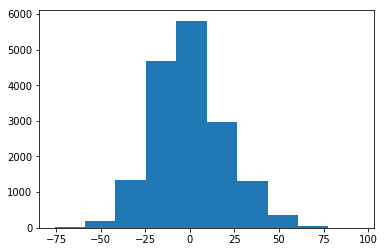

In [16]:
# plt.plot(roto['critic_percent'],roto['audience_percent'], 'b.', alpha = 0.5)
# plt.plot(roto['critic_percent'], roto['prediction'], 'r-', linewidth = 3)
# plt.show()
plt.hist(roto['audience_percent']-roto['prediction']);
stats.normaltest(roto['audience_percent']-roto['prediction']).pvalue